In [100]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [101]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [102]:

#create empty list for all of city api calls
main = []

print("Beginning Data Retrieval     ")
print("-------------------------------")
rec = 1
setc = 1

# for all the city names in cities list, loop through and process record
for index, city in enumerate(cities):
        
    #Create records and sets
    if (index % 50 == 0 and index >= 50):
        setc = setc + 1
        rec = 0    
    #pring log of each city
    print(f"Processing Record {rec} of Set {setc} : {city}") 

    rec = rec + 1

    #Make API request for cities
    try:
        #retrieve data
        city_weather = requests.get("http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c&q=" + city).json()

        #add this city to the main city list
        main.append({"City": city, 
                          "Lat": city_weather["coord"]["lat"], 
                          "Lng": city_weather["coord"]["lon"], 
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"],
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"],
                          "Date": city_weather["dt"]})

    #catch errors for city not found
    except:
        print("City not found. Skipping...")
        pass
              
#print for finishing the data loop
print("-------------------------------")
print("Data Retrieval Complete      ")
print("-------------------------------")

Beginning Data Retrieval     
-------------------------------
Processing Record 1 of Set 1 : barrow
Processing Record 2 of Set 1 : vaini
Processing Record 3 of Set 1 : lolua
City not found. Skipping...
Processing Record 4 of Set 1 : upata
Processing Record 5 of Set 1 : port elizabeth
Processing Record 6 of Set 1 : langxiang
Processing Record 7 of Set 1 : najran
Processing Record 8 of Set 1 : tilichiki
Processing Record 9 of Set 1 : balykshi
Processing Record 10 of Set 1 : pevek
Processing Record 11 of Set 1 : tuktoyaktuk
Processing Record 12 of Set 1 : rikitea
Processing Record 13 of Set 1 : riyadh
Processing Record 14 of Set 1 : portland
Processing Record 15 of Set 1 : chik
Processing Record 16 of Set 1 : albany
Processing Record 17 of Set 1 : malanje
Processing Record 18 of Set 1 : yerbogachen
Processing Record 19 of Set 1 : dengfeng
Processing Record 20 of Set 1 : gazanjyk
Processing Record 21 of Set 1 : sahbuz
Processing Record 22 of Set 1 : yarmouth
Processing Record 23 of Set 1 :

Processing Record 40 of Set 4 : nelson bay
Processing Record 41 of Set 4 : taltal
Processing Record 42 of Set 4 : naze
Processing Record 43 of Set 4 : muscatine
Processing Record 44 of Set 4 : roma
Processing Record 45 of Set 4 : nikolskoye
Processing Record 46 of Set 4 : hailey
Processing Record 47 of Set 4 : leningradskiy
Processing Record 48 of Set 4 : esperance
Processing Record 49 of Set 4 : paamiut
Processing Record 0 of Set 5 : amderma
City not found. Skipping...
Processing Record 1 of Set 5 : higuey
City not found. Skipping...
Processing Record 2 of Set 5 : cape coast
Processing Record 3 of Set 5 : urdzhar
City not found. Skipping...
Processing Record 4 of Set 5 : labuhan
Processing Record 5 of Set 5 : jawhar
Processing Record 6 of Set 5 : petropavlovsk-kamchatskiy
Processing Record 7 of Set 5 : umzimvubu
City not found. Skipping...
Processing Record 8 of Set 5 : okhotsk
Processing Record 9 of Set 5 : turinsk
Processing Record 10 of Set 5 : taksimo
Processing Record 11 of Set 5

Processing Record 31 of Set 8 : tautira
Processing Record 32 of Set 8 : shchuchye
City not found. Skipping...
Processing Record 33 of Set 8 : charlestown
Processing Record 34 of Set 8 : ust-kuyga
Processing Record 35 of Set 8 : miyako
Processing Record 36 of Set 8 : fuyu
Processing Record 37 of Set 8 : puerto colombia
Processing Record 38 of Set 8 : savonlinna
Processing Record 39 of Set 8 : viligili
City not found. Skipping...
Processing Record 40 of Set 8 : lalomanu
City not found. Skipping...
Processing Record 41 of Set 8 : tokur
Processing Record 42 of Set 8 : akdepe
Processing Record 43 of Set 8 : andevoranto
City not found. Skipping...
Processing Record 44 of Set 8 : tyulgan
Processing Record 45 of Set 8 : ginda
Processing Record 46 of Set 8 : luau
Processing Record 47 of Set 8 : novyy urengoy
Processing Record 48 of Set 8 : cockburn town
Processing Record 49 of Set 8 : gazli
Processing Record 0 of Set 9 : san martino di lupari
Processing Record 1 of Set 9 : san patricio
Processi

Processing Record 19 of Set 12 : ancud
Processing Record 20 of Set 12 : shakawe
Processing Record 21 of Set 12 : samarkand
Processing Record 22 of Set 12 : lavrentiya
Processing Record 23 of Set 12 : newton
Processing Record 24 of Set 12 : bischwiller
Processing Record 25 of Set 12 : tsevie
Processing Record 26 of Set 12 : coihaique
Processing Record 27 of Set 12 : wadi maliz
Processing Record 28 of Set 12 : port-gentil
Processing Record 29 of Set 12 : corabia
Processing Record 30 of Set 12 : fukue
Processing Record 31 of Set 12 : meadow lake
Processing Record 32 of Set 12 : bogande
Processing Record 33 of Set 12 : cottonwood
Processing Record 34 of Set 12 : hurghada
Processing Record 35 of Set 12 : labrea
Processing Record 36 of Set 12 : wajima
Processing Record 37 of Set 12 : manono
Processing Record 38 of Set 12 : hashtgerd
Processing Record 39 of Set 12 : carira
Processing Record 40 of Set 12 : altavilla vicentina
Processing Record 41 of Set 12 : pokhara
Processing Record 42 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [153]:
#create panda frame and display
main_data = pd.DataFrame(main)
main_data.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [154]:
main_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,10.40,78,90,10.29,US,1604970601
1,vaini,-21.20,-175.20,82.40,78,40,10.29,TO,1604970679
2,upata,8.01,-62.40,80.01,87,100,1.01,VE,1604970740
3,port elizabeth,-33.92,25.57,55.40,82,0,11.41,ZA,1604970699
4,langxiang,46.95,128.88,19.42,84,98,5.08,CN,1604971089


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [155]:
main_data.describe() 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.628528,16.128725,56.520431,73.912029,48.929982,7.831831,1.604971e+09
std,33.298054,88.444773,22.874185,19.590625,41.158499,5.897322,2.076037e+02
min,-54.800000,-179.170000,-24.200000,1.000000,0.000000,0.040000,1.604970e+09
25%,-7.950000,-58.800000,41.000000,63.000000,1.000000,3.360000,1.604971e+09
50%,27.050000,20.040000,62.490000,78.000000,42.000000,6.530000,1.604971e+09
75%,47.070000,87.980000,74.610000,88.000000,90.000000,10.470000,1.604971e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,39.150000,1.604971e+09


In [156]:
#take from main data cities with humidity over 100%
humid_df = main_data[(main_data["Humidity"] > 100)].index                
humid_df

Int64Index([], dtype='int64')

In [157]:
#new frame drops humidity over 100% cities
new_df = main_data.drop(humid_df, inplace=False)
new_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,10.40,78,90,10.29,US,1604970601
1,vaini,-21.20,-175.20,82.40,78,40,10.29,TO,1604970679
2,upata,8.01,-62.40,80.01,87,100,1.01,VE,1604970740
3,port elizabeth,-33.92,25.57,55.40,82,0,11.41,ZA,1604970699
4,langxiang,46.95,128.88,19.42,84,98,5.08,CN,1604971089


In [158]:

#create a csv file out of data
new_df.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

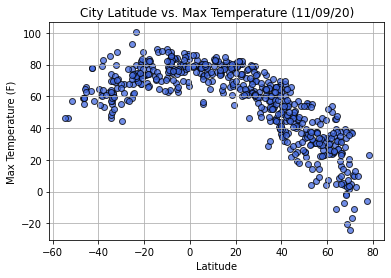

In [159]:
#Scatter plot for relationship of city latitude vs. max temperature
plt.scatter(new_df["Lat"], new_df["Max Temp"], edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Max_Temperature.png")

#Display the graph
plt.show()

## Latitude vs. Humidity Plot

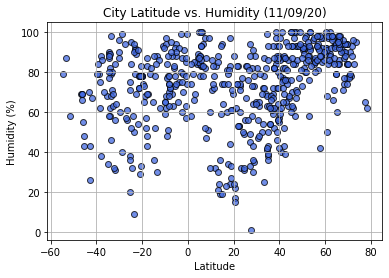

In [160]:
#Scatter plot for relationship of city latitude vs. humidity %
plt.scatter(new_df["Lat"], new_df["Humidity"],edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Humidity.png")

#Display the graph
plt.show()

## Latitude vs. Cloudiness Plot

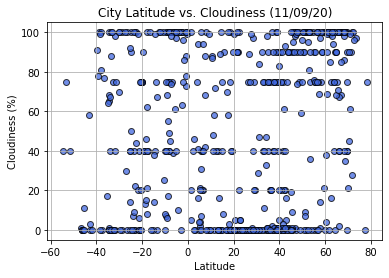

In [161]:
#Scatter plot for relationship of city latitude vs. cloudiness
plt.scatter(new_df["Lat"], new_df["Cloudiness"], edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Cloudiness.png")

#Display the graph
plt.show()

## Latitude vs. Wind Speed Plot

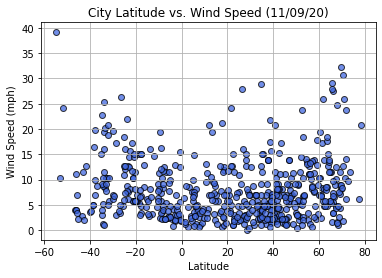

In [162]:
#Scatter plot for relationship of city latitude vs. wind speed (mph)
plt.scatter(new_df["Lat"], new_df["Wind Speed"],edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Windspeed.png")

#Display the graph
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7483082082713362


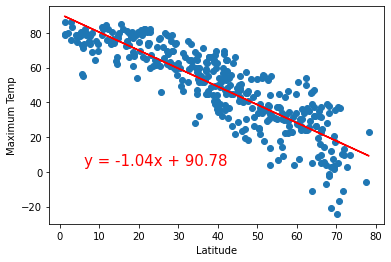

In [164]:
#Linear regression for Northern hemi: Max Temperature vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Max Temp"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Max Temp"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(6,4),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Max_Temp_Vs_Latitude_Lingress.png")
plt.show()

There is a strong negative correlation when comparing latitude and maximum temperature in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3401096967281234


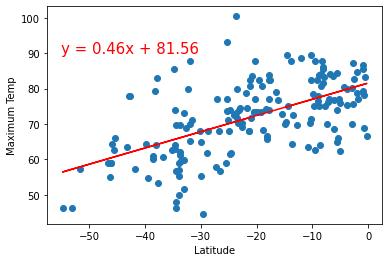

In [165]:
#Linear regression for Southern hemi: Max Temperature vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Max Temp"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Max Temp"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-55, 90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Southern_Max_Temp_Vs_Latitude_Lingress.png")
plt.show()

There is a moderate positive correlation when comparing latitude and maximum temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.14454093591396483


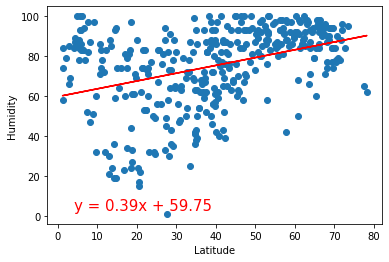

In [166]:
#Linear regression for Northern hemi: Humidity vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Humidity"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Humidity"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(4,3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Humidity_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.04510716303242673


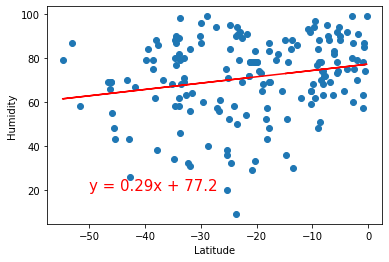

In [167]:
#Linear regression for Southern hemi: Humidity vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Humidity"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Humidity"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Southern_Humidity_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.13960538592683958


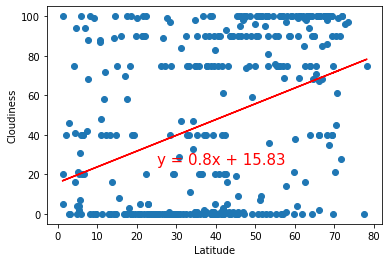

In [168]:
#Linear regression for Northern hemi: Cloudiness vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Cloudiness"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Cloudiness"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(25,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Cloudiness_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.1228482433577528


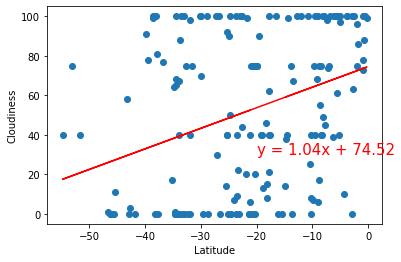

In [169]:
#Linear regression for Southern hemi: Cloudiness vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Cloudiness"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Cloudiness"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Southern_Cloudiness_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.06696881191773141


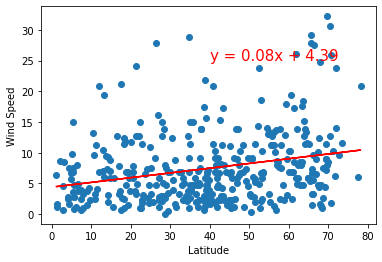

In [170]:
#Linear regression for Northern hemi: Wind Speed vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Wind Speed"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Wind Speed"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Wind_Speed_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.08374166339699951


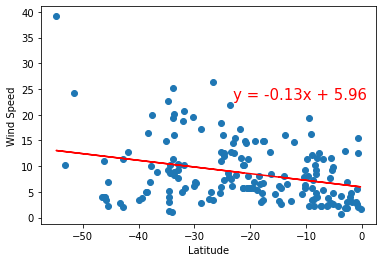

In [171]:
#Linear regression for Southern hemi: Wind Speed vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Wind Speed"])
regress_values = main_data.loc[(main_data["Lat"] < 0)]["Lat"] * slope + intercept
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Wind Speed"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-23, 23),fontsize=15,color="red")
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#Send png image to output_data
plt.savefig("output_data/Southern_Wind_Speed_Vs_Latitude_Lingress.png")
plt.show()

There is a weak negative correlation when comparing latitude and wind speed in the southern hemisphere.